# Confusion Matrix, Sensitivity & Specificity

- StatQuest Videos: 
  - Confusion Matrix: https://youtu.be/Kdsp6soqA7o
  - Sensitivity & Specificity: https://youtu.be/vP06aMoz4v8
- SKLearn Docs: https://scikit-learn.org/stable/modules/model_evaluation.html

The confusion matrix shows what your machine learning algorithm predicted vs. the known truth. It helps evaluate and compare different ML methods by summarizing their performance on test data.

**⚠️ Convention Note**: StatQuest videos use "Rows = predictions, Columns = actual truth" but **sklearn uses the opposite**: "Rows = actual truth, Columns = predictions". This notebook follows sklearn's convention.

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=300, n_features=4, n_classes=2, 
                          n_redundant=0, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 4), (90, 4), (210,), (90,))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

y_pred_lr.shape, y_pred_rf.shape

((90,), (90,))

### Binary Classification Confusion Matrix

**Important**: Sklearn uses **Rows = True labels, Columns = Predicted labels** (opposite of StatQuest videos!)

For 2-class problems (e.g., has disease / no disease) in sklearn:
- **True Negatives (TN)**: Top-left [0,0] - correctly predicted negative cases  
- **False Positives (FP)**: Top-right [0,1] - incorrectly predicted positive cases (Type I error)
- **False Negatives (FN)**: Bottom-left [1,0] - missed positive cases (Type II error)
- **True Positives (TP)**: Bottom-right [1,1] - correctly predicted positive cases

Diagonal elements = correct predictions, off-diagonal = mistakes

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)

print(cm)
print(f"\nTP: {cm[1,1]}, TN: {cm[0,0]}, FP: {cm[0,1]}, FN: {cm[1,0]}")

[[40  2]
 [ 3 45]]

TP: 45, TN: 40, FP: 2, FN: 3


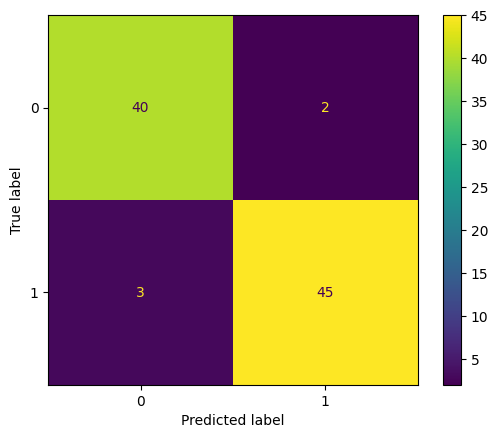

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)